<a href="https://colab.research.google.com/github/nikit34/training_DS/blob/main/custom_StochasticGradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset.csv', sep=',')

In [3]:
x = data['weight']
y = data['height']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [4]:
x_train = np.array(x_train)
y_train = np.array(y_train)

# нормализуем по минимальному значению
scaler = preprocessing.MaxAbsScaler()
x_scaled = scaler.fit_transform(x_train.reshape(-1,1))
y_scaled = scaler.fit_transform(y_train.reshape(-1,1))

x_train = pd.DataFrame(x_scaled)
y_train = pd.DataFrame(y_scaled)

In [43]:
class StochasticGradientDescent:
    def __init__(self, learn_rate=0.001, num_iterate=1000, k=10):
        self.learn_rate = learn_rate
        self.num_iterate = num_iterate
        self.k = k
        
        self.weight = None
        self.bias = None

    def fit(self, x_train, y_train):
        len_train = len(x_train)

        if len_train != len(y_train) or len_train == 0:
            raise IndexError("Dimension of data does not match pattern")

        weight_current = np.zeros(shape=(1, x_train.shape[1]))
        bias_current = 0
        current_iterate = 1

        while current_iterate <= self.num_iterate:
            weight_old = weight_current
            bias_old = bias_current

            weight_tmp = np.zeros(shape=(1, x_train.shape[1]))
            bias_tmp = 0

            random_indexes = np.random.choice(len_train, replace=False, size=self.k) # return rundom indexes (random_state for reproducibility)
            x = np.array(x_train.iloc[random_indexes, :])
            y = np.array(y_train.iloc[random_indexes, 0])

            for i in range(len(x)):
                # 'Implicit updates', where -2/k  - can take any number between 0 and 1 or other method optimizing
                weight_tmp += x[i] * (y[i] - (np.dot(weight_old, x[i]) + bias_old)) * (-2 / self.k)  
                bias_tmp += (y[i] - (np.dot(weight_old, x[i]) + bias_old)) * (-2 / self.k)

            weight_current = weight_old - self.learn_rate * weight_tmp
            bias_current = bias_old - self.learn_rate * bias_tmp

            if (weight_old == weight_current).all(): # stopped learning 
                break
            current_iterate += 1

        self.weight = weight_current, 
        self.bias = bias_current
        return weight_current, bias_current

    def predict(self, x):
        if self.weight is None or self.bias is None:
            raise Warning("Used parameters dont change")
        y_pred = []
        x = np.array(x)
        for i in range(len(x)):
            y = np.asscalar(np.dot(self.weight[0], x[i]) + self.bias)
            print(y)
            y_pred.append(y)
        return np.array(y_pred)  

In [44]:
SGD = StochasticGradientDescent()
SGD.fit(x_train, y_train)
y_pred = SGD.predict(x_test)

[[0.41892624]] [54.3  54.42 56.16 75.05 79.77 94.3  64.79 90.7  52.2  75.14 89.13 90.36
 91.9  53.2  68.41 51.56 92.98 88.36 84.46 96.82]
23.308301240990325
[[0.41892624]] [54.3  54.42 56.16 75.05 79.77 94.3  64.79 90.7  52.2  75.14 89.13 90.36
 91.9  53.2  68.41 51.56 92.98 88.36 84.46 96.82]
23.358572389919217
[[0.41892624]] [54.3  54.42 56.16 75.05 79.77 94.3  64.79 90.7  52.2  75.14 89.13 90.36
 91.9  53.2  68.41 51.56 92.98 88.36 84.46 96.82]
24.087504049388144
[[0.41892624]] [54.3  54.42 56.16 75.05 79.77 94.3  64.79 90.7  52.2  75.14 89.13 90.36
 91.9  53.2  68.41 51.56 92.98 88.36 84.46 96.82]
32.00102074327784
[[0.41892624]] [54.3  54.42 56.16 75.05 79.77 94.3  64.79 90.7  52.2  75.14 89.13 90.36
 91.9  53.2  68.41 51.56 92.98 88.36 84.46 96.82]
33.978352601147584
[[0.41892624]] [54.3  54.42 56.16 75.05 79.77 94.3  64.79 90.7  52.2  75.14 89.13 90.36
 91.9  53.2  68.41 51.56 92.98 88.36 84.46 96.82]
40.06535088395422
[[0.41892624]] [54.3  54.42 56.16 75.05 79.77 94.3  64.79 90

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


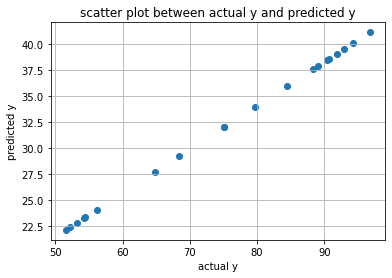

In [46]:
    plt.scatter(x_test, y_pred)
    plt.grid()
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.show()    